# MNIST 손글씨 이미지 인식률 99.5% 만들기

## 1.. MNIST 데이터 다운로드 및 확인

In [0]:
# Jupyter notebook 에서 실행할 경우 삭제하세요.
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터 다운로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

TensorFlow 2.x selected.
11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Y[0] :  5


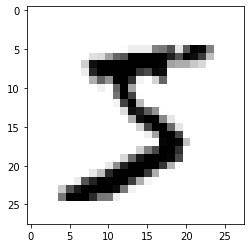

In [0]:
# 데이터 구조 확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print("Y[0] : ",  y_train[0])
plt.imshow(x_train[0], cmap=plt.cm.gray_r, interpolation = "nearest")

In [0]:
x_train.reshape()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## 2.. 로지스틱 회귀

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 각종 파라메터의 영향을 보기 위해 랜덤값 고정
tf.random.set_seed(1234)

# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 784)로 reshape
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6243 - accuracy: 0.8461 - val_loss: 0.3687 - val_accuracy: 0.9048
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.9073 - val_loss: 0.3093 - val_accuracy: 0.9148
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.9149 - val_loss: 0.2922 - val_accuracy: 0.9188
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2920 - accuracy: 0.9191 - val_loss: 0.2813 - val_accuracy: 0.9218
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2

## 3.. 딥 뉴럴 네트워크 (NN)

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 각종 파라메터의 영향을 보기 위해 랜덤값 고정
tf.random.set_seed(1234)

# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 784)로 reshape
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=256, input_dim=784, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2997 - accuracy: 0.9129 - val_loss: 0

## 4.. 컨볼루션 뉴럴 네트워크(CNN)

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 각종 파라메터의 영향을 보기 위해 랜덤값 고정
tf.random.set_seed(1234)

# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 28, 28, 1)로 reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28,28,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)             